In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns" , None)

In [2]:
df = pd.read_csv("C:\oasis\Advertising.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 1.DATA CLEANING AND PRE-PROCESSING

In [5]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [7]:
print("Number of Rows -----> {} \n Number of Columns -----> {} ".format(df.shape[0] , df.shape[1]))
print("\n Data type of the columns \n")
df.info()

Number of Rows -----> 200 
 Number of Columns -----> 4 

 Data type of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# check the nulls

df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

# EDA

In [14]:
print("\nDescription of the dataset")
df.describe()


Description of the dataset


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


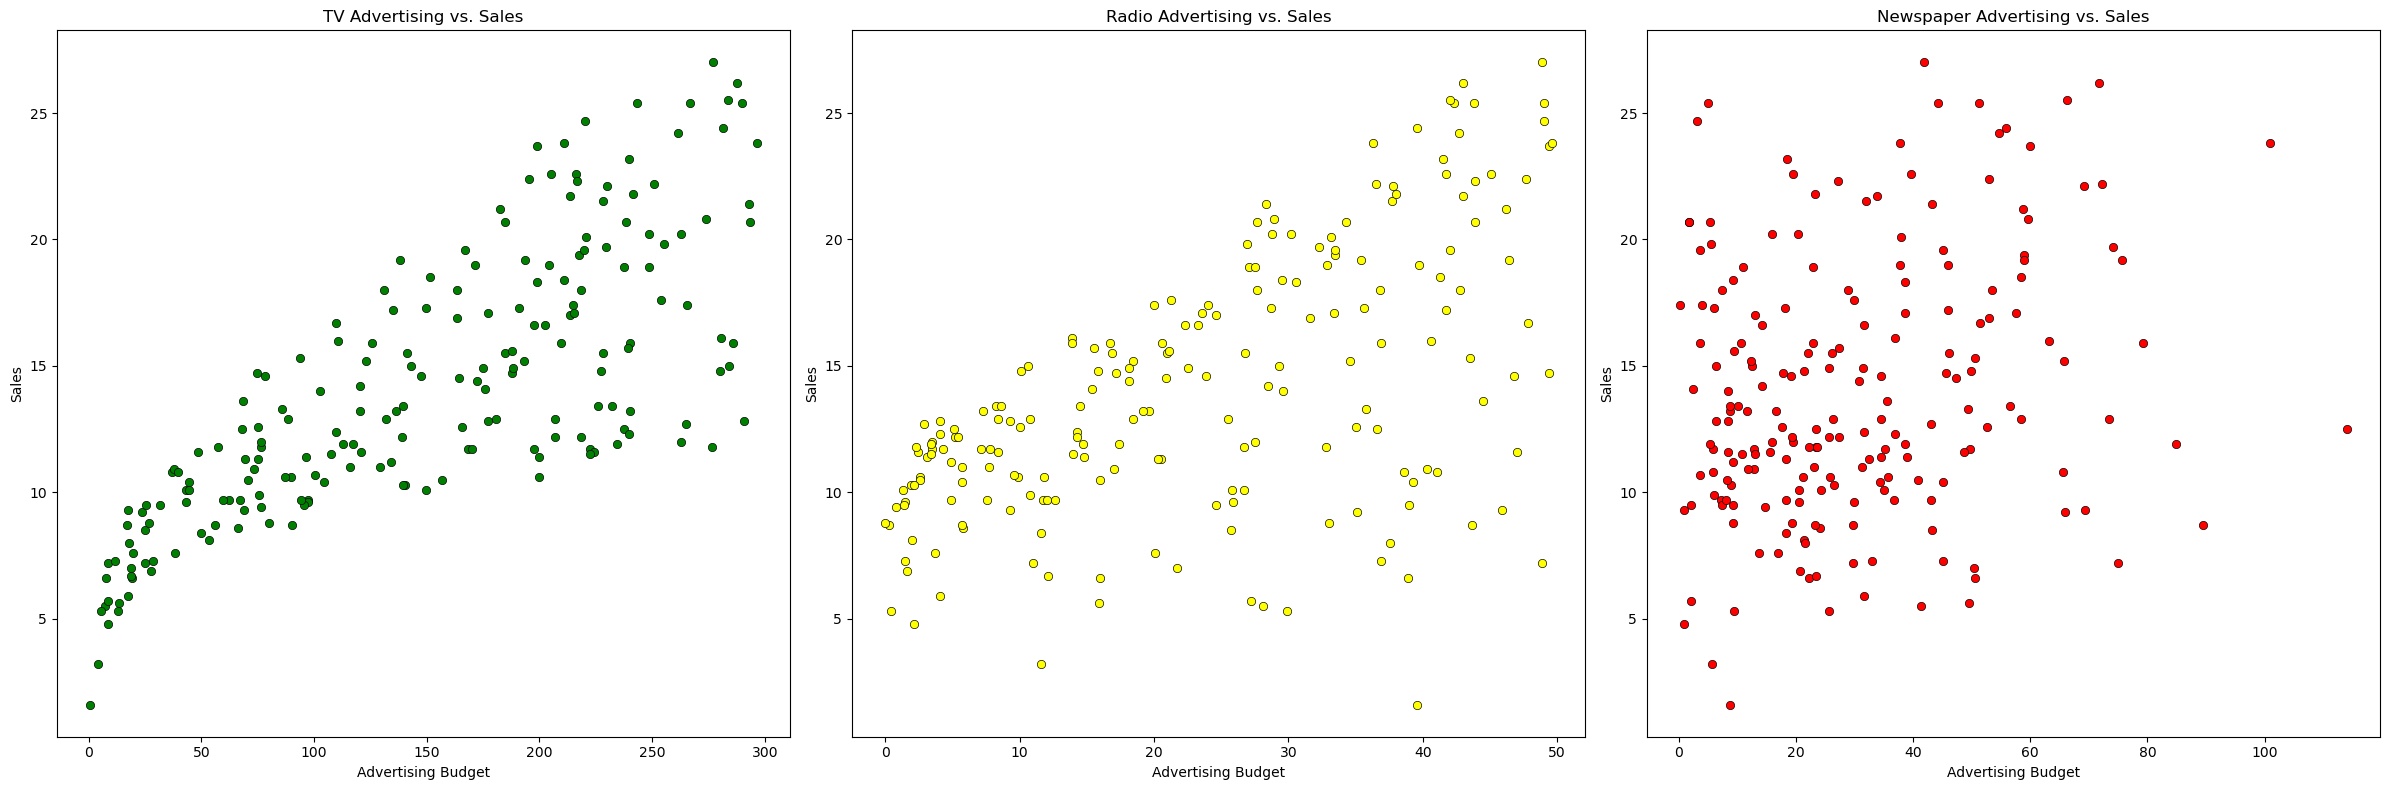

In [109]:

fig, axes = plt.subplots(1, 3, figsize=(24 , 8))

# Scatter plot for TV data 

sns.scatterplot(data=df, x='TV', y='Sales',color='green', edgecolor='black', ax=axes[0])
axes[0].set_title('TV Advertising vs. Sales' )

# Scatter plot for Radio data 

sns.scatterplot(data=df, x='Radio', y='Sales',color='yellow', edgecolor='black', ax=axes[1])
axes[1].set_title('Radio Advertising vs. Sales')

# Scatter plot for Newspaper data 

sns.scatterplot(data=df, x='Newspaper',y='Sales',color='red', edgecolor='black' ,ax=axes[2])
axes[2].set_title('Newspaper Advertising vs. Sales')

# Set common labels for all subplots
for ax in axes:
    ax.set_xlabel('Advertising Budget')
    ax.set_ylabel('Sales')

plt.tight_layout()  # Adjust subplot spacing

plt.show()  # Display the plot

kutosis of the sales data -0.40886922014994376


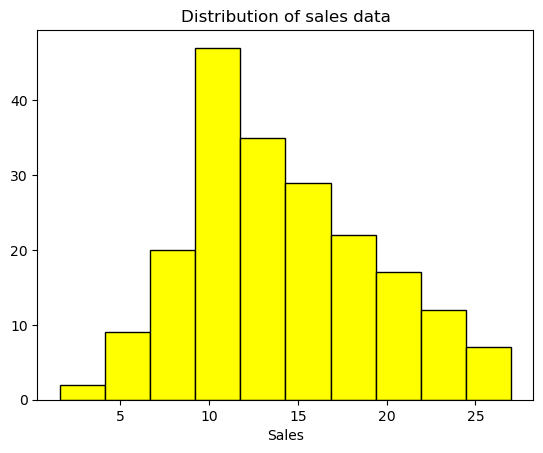

In [37]:
plt.hist(df.Sales,color="yellow" , bins =10, edgecolor = "black")
plt.xlabel("Sales")
plt.title("Distribution of sales data")
print("kutosis of the sales data" , df.Sales.kurtosis())

<Axes: >

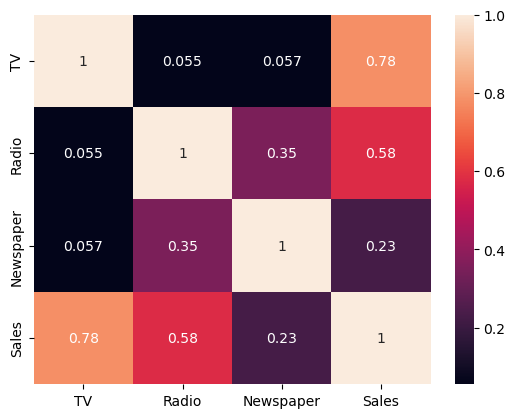

In [40]:
sns.heatmap(df.corr().round(3) , annot=True)

Inference :- Very less Corelation between the independent variables

In [41]:
x = df.iloc[: ,:-1]
y = df.iloc[: ,-1]

# PREDECTIVE MODELING

In [43]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size=.2)

In [44]:
print("shape of train X --->",x_train.shape)
print("shape of train Y --->",y_train.shape)
print("shape of test X --->",x_test.shape)
print("shape of test Y --->",y_test.shape)

shape of train X ---> (160, 3)
shape of train Y ---> (160,)
shape of test X ---> (40, 3)
shape of test Y ---> (40,)


In [110]:
from sklearn.metrics import mean_squared_error ,r2_score

# 1. LINEAR REGRESSION

In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [57]:
linreg.fit(x_train , y_train)
pred_train = linreg.predict(x_train)
err_train = y_train-pred_train

Rsquare = linreg.score(x_train,y_train)

N = x_train.shape[0]
K = x_test.shape[1]
AdjRsquare = 1- (1-Rsquare) *(N-1) / (N-K-1)


pred_test = linreg.predict(x_test)
err_test = y_test - pred_test

MSE = np.mean(np.square(err_test))
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs(err_test*100 / y_test))

accuray_of_model = 100 - MAPE

print("ACCURACY OF THE MODEL------->",accuray_of_model)
print("\nR SQUARE------------>", Rsquare)
print("\nADJUSTED R SQUARE-------->" , AdjRsquare)
print("\nMEAN SQUARE ERROR------->",MSE)
print("\nROOT MEAN SQUARE ERROR------>",RMSE)
print("\nMEAN ABSOLUTE PERCENTAGE ERROR",MAPE)


ACCURACY OF THE MODEL-------> 89.85705252196234

R SQUARE------------> 0.8971885741785105

ADJUSTED R SQUARE--------> 0.8952114313742511

MEAN SQUARE ERROR-------> 1.9531484832124881

ROOT MEAN SQUARE ERROR------> 1.3975508875216274

MEAN ABSOLUTE PERCENTAGE ERROR 10.142947478037659


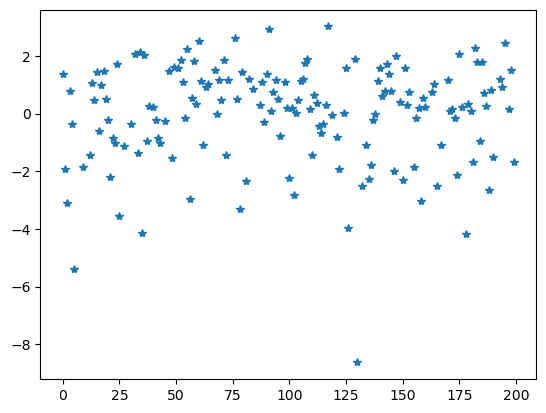

In [52]:
plt.plot(err_train , "*") # scatter plot

In [54]:
pred_actual = pd.DataFrame()
pred_actual ['Actual'] = y_train
pred_actual ['Predicted'] = pred_train

pred_actual

,Actual,Predicted
52,22.6,20.741807
107,8.7,6.956049
60,8.1,5.562226
99,17.2,16.994236
100,11.7,13.926469
...,...,...
47,23.2,21.727490
144,11.4,10.037374
137,20.8,21.024938
91,7.3,4.348256


<Axes: xlabel='Actual', ylabel='Predicted'>

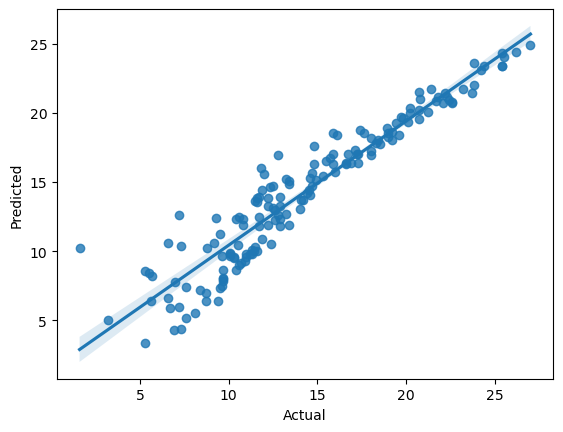

In [55]:
sns.regplot(x ='Actual' , y = 'Predicted' , data = pred_actual)

# 2.LASSO

In [92]:
from sklearn.linear_model import Lasso
la = Lasso()

In [93]:
la.fit(x_train , y_train)
pred_train = la.predict(x_train)
err_train = y_train-pred_train

Rsquare_la = la.score(x_train,y_train)

N = x_train.shape[0]
K = x_test.shape[1]
AdjRsquare_la = 1- (1-Rsquare) *(N-1) / (N-K-1)


pred_test = la.predict(x_test)
err_test = y_test - pred_test

MSE_la = np.mean(np.square(err_test))
RMSE_la = np.sqrt(MSE)
MAPE_la = np.mean(np.abs(err_test*100 / y_test))

accuray_of_model_la = 100 - MAPE

print("ACCURACY OF THE MODEL------->",accuray_of_model_la)
print("\nR SQUARE------------>", Rsquare_la)
print("\nADJUSTED R SQUARE-------->" , AdjRsquare_la)
print("\nMEAN SQUARE ERROR------->",MSE_la)
print("\nROOT MEAN SQUARE ERROR------>",RMSE_la)
print("\nMEAN ABSOLUTE PERCENTAGE ERROR",MAPE_la)


ACCURACY OF THE MODEL-------> 89.85705252196234

R SQUARE------------> 0.8970217279156822

ADJUSTED R SQUARE--------> 0.9988126764098905

MEAN SQUARE ERROR-------> 1.8910990507799945

ROOT MEAN SQUARE ERROR------> 1.3975508875216274

MEAN ABSOLUTE PERCENTAGE ERROR 9.873036201239053


In [94]:
pred_actual_lasso = pd.DataFrame()
pred_actual_lasso ['Actual'] = y_train
pred_actual_lasso ['Predicted'] = pred_train

pred_actual_lasso

,Actual,Predicted
52,22.6,20.660544
107,8.7,7.055708
60,8.1,5.660363
99,17.2,16.912048
100,11.7,13.971823
...,...,...
47,23.2,21.668691
144,11.4,10.065458
137,20.8,20.964382
91,7.3,4.437199


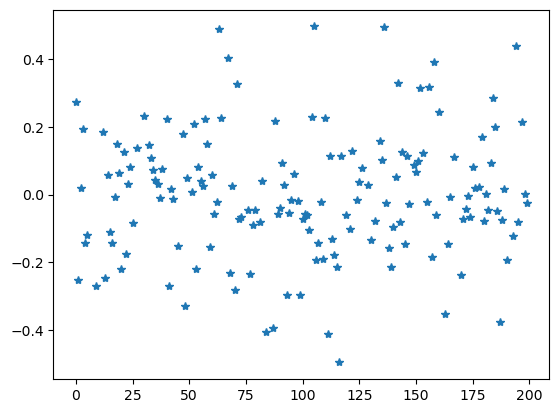

In [105]:
plt.plot(err_train , "*")

<Axes: xlabel='Actual', ylabel='Predicted'>

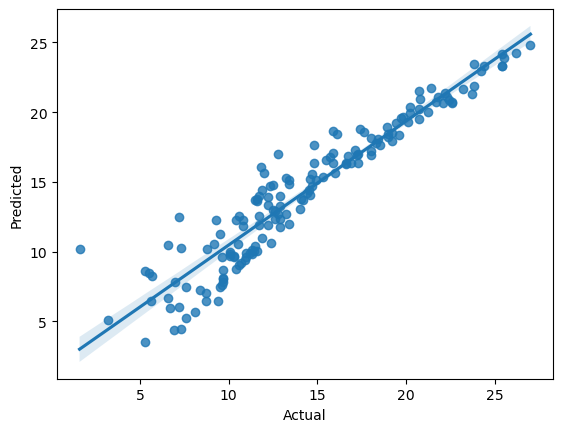

In [101]:
sns.regplot(x ='Actual' , y = 'Predicted' , data = pred_actual_lasso)

# 3.RIDGE

In [95]:
from sklearn.linear_model import Ridge
ri = Ridge()

In [96]:
ri.fit(x_train , y_train)
pred_train = la.predict(x_train)
err_train = y_train-pred_train

Rsquare_ri = ri.score(x_train,y_train)

N = x_train.shape[0]
K = x_test.shape[1]
AdjRsquare_ri = 1- (1-Rsquare) *(N-1) / (N-K-1)


pred_test = la.predict(x_test)
err_test = y_test - pred_test

MSE_ri = np.mean(np.square(err_test))
RMSE_ri = np.sqrt(MSE)
MAPE_ri = np.mean(np.abs(err_test*100 / y_test))

accuray_of_model_ri = 100 - MAPE

print("ACCURACY OF THE MODEL------->",accuray_of_model_ri)
print("\nR SQUARE------------>", Rsquare_ri)
print("\nADJUSTED R SQUARE-------->" , AdjRsquare_ri)
print("\nMEAN SQUARE ERROR------->",MSE_ri)
print("\nROOT MEAN SQUARE ERROR------>",RMSE_ri)
print("\nMEAN ABSOLUTE PERCENTAGE ERROR",MAPE_ri)


ACCURACY OF THE MODEL-------> 89.85705252196234

R SQUARE------------> 0.8971885739363784

ADJUSTED R SQUARE--------> 0.9988126764098905

MEAN SQUARE ERROR-------> 1.8910990507799945

ROOT MEAN SQUARE ERROR------> 1.3975508875216274

MEAN ABSOLUTE PERCENTAGE ERROR 9.873036201239053


In [103]:
pred_actual_ridge

,Actual,Predicted
52,22.6,20.660544
107,8.7,7.055708
60,8.1,5.660363
99,17.2,16.912048
100,11.7,13.971823
...,...,...
47,23.2,21.668691
144,11.4,10.065458
137,20.8,20.964382
91,7.3,4.437199


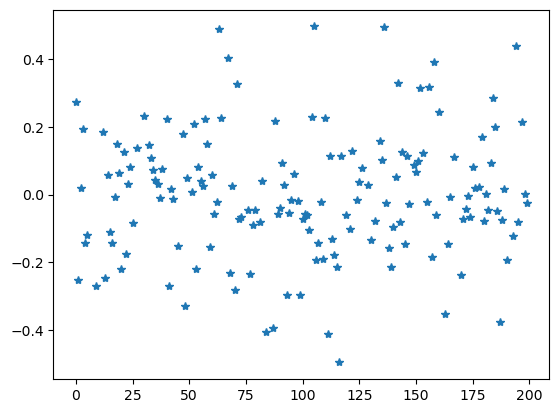

In [106]:
plt.plot(err_train , "*")

<Axes: xlabel='Actual', ylabel='Predicted'>

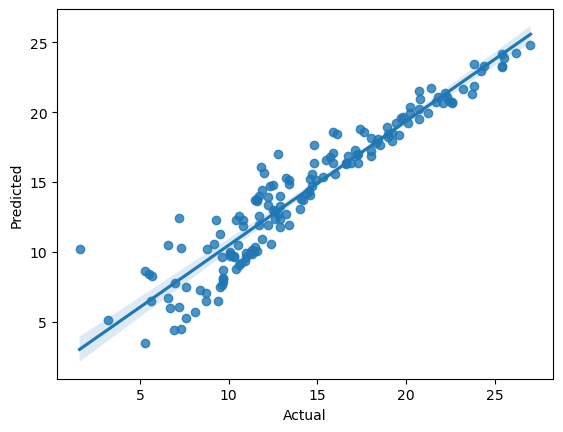

In [102]:
sns.regplot(x ='Actual' , y = 'Predicted' , data = pred_actual_ridge)

# 4. GRAIDENT BOOST

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [99]:
gb.fit(x_train , y_train)
pred_train = gb.predict(x_train)
err_train = y_train-pred_train

Rsquare_gb = gb.score(x_train,y_train)

N = x_train.shape[0]
K = x_test.shape[1]
AdjRsquare_gb = 1- (1-Rsquare) *(N-1) / (N-K-1)


pred_test = gb.predict(x_test)
err_test = y_test - pred_test

MSE_gb = np.mean(np.square(err_test))
RMSE_gb = np.sqrt(MSE)
MAPE_gb = np.mean(np.abs(err_test*100 / y_test))

accuray_of_model_gb = 100 - MAPE

print("ACCURACY OF THE MODEL------->",accuray_of_model_gb)
print("\nR SQUARE------------>", Rsquare_gb)
print("\nADJUSTED R SQUARE-------->" , AdjRsquare_gb)
print("\nMEAN SQUARE ERROR------->",MSE_gb)
print("\nROOT MEAN SQUARE ERROR------>",RMSE_gb)
print("\nMEAN ABSOLUTE PERCENTAGE ERROR",MAPE_gb)


ACCURACY OF THE MODEL-------> 89.85705252196234

R SQUARE------------> 0.9988350787417793

ADJUSTED R SQUARE--------> 0.9988126764098905

MEAN SQUARE ERROR-------> 0.3680983567886223

ROOT MEAN SQUARE ERROR------> 1.3975508875216274

MEAN ABSOLUTE PERCENTAGE ERROR 3.8863824454432625


In [100]:
pred_actual_gb = pd.DataFrame()
pred_actual_gb ['Actual'] = y_train
pred_actual_gb ['Predicted'] = pred_train

pred_actual_gb

,Actual,Predicted
52,22.6,22.391333
107,8.7,8.842841
60,8.1,8.040368
99,17.2,17.496400
100,11.7,11.772017
...,...,...
47,23.2,23.020410
144,11.4,11.272273
137,20.8,20.825097
91,7.3,7.204870


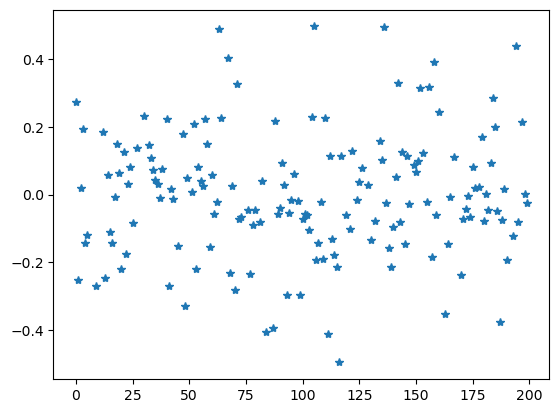

In [107]:
plt.plot(err_train , "*")

<Axes: xlabel='Actual', ylabel='Predicted'>

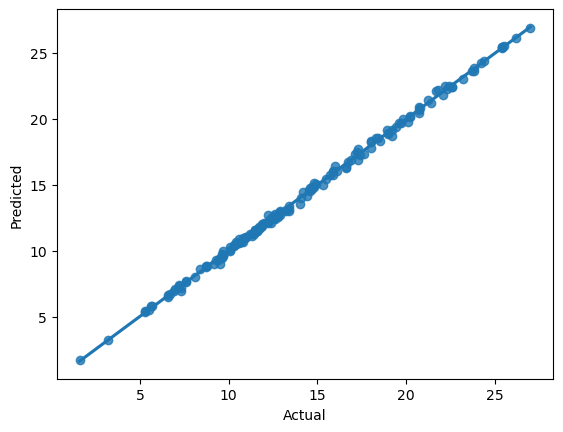

In [104]:
sns.regplot(x ='Actual' , y = 'Predicted' , data = pred_actual_gb)

In [114]:
# Defining the models needed for the predictions 
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0)
}

# Models training and evaluation metrics 
def train_and_evaluate(models, x_train, x_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(err_test*100 / y_test))
        accuracy = 100 -mae
        adR2= r2_score(y_test, y_pred)
        results.append([name, mse, rmse, mae , accuracy , adR2])
    return results

In [115]:
# Train and evaluate each model
results = train_and_evaluate(models, x_train, x_test, y_train, y_test)



# Create a tabular representation of results

table = tabulate(results, headers=['The Models', 'MSE', 'RMSE', 'MAE', 'ACCURACY','ADJUSTED R2'], tablefmt='grid')
print(table)

+-------------------+----------+----------+---------+------------+---------------+
| The Models        |      MSE |     RMSE |     MAE |   ACCURACY |   ADJUSTED R2 |
+===================+==========+==========+=========+============+===============+
| Linear Regression | 1.95315  | 1.39755  | 3.88638 |    96.1136 |      0.885072 |
+-------------------+----------+----------+---------+------------+---------------+
| Gradient Boosting | 0.365813 | 0.604825 | 3.88638 |    96.1136 |      0.978475 |
+-------------------+----------+----------+---------+------------+---------------+
| Lasso             | 1.8911   | 1.37517  | 3.88638 |    96.1136 |      0.888723 |
+-------------------+----------+----------+---------+------------+---------------+
| Ridge             | 1.95313  | 1.39754  | 3.88638 |    96.1136 |      0.885073 |
+-------------------+----------+----------+---------+------------+---------------+


Here the accuracy of all the models is same but we have to focus on the adjusted r square value because higher ther the value of adjusted R square better is the model

Since Gradient Boosting has the highest Adjusted R Square value so it is the best model model amongst all